In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from tree.base import DecisionTree
from metrics import *

np.random.seed(42)
num_average_time = 3  # Number of times to run each experiment to calculate the average values

In [2]:
# Function to create fake data (take inspiration from usage.py)
# ...
def RealReal(N,M):
    X = pd.DataFrame(np.random.randn(N, M))
    y = pd.Series(np.random.randn(N))
    return X,y
def RealDiscrete(N,M):
    X = pd.DataFrame(np.random.randn(N, M))
    y = pd.Series(np.random.randint(2, size=N), dtype="category")
    return X,y
def DiscreteDiscrete(N,M):
    X = pd.DataFrame({i: pd.Series(np.random.randint(2, size=N), dtype="category") for i in range(M)})
    y = pd.Series(np.random.randint(2, size=N), dtype="category")
    return X,y
def DiscreteReal(N,M):
    X = pd.DataFrame({i: pd.Series(np.random.randint(2, size=N), dtype="category") for i in range(M)})
    y = pd.Series(np.random.randn(N))
    return X,y

In [3]:
# Function to calculate average time (and std) taken by fit() and predict() for different N and P for 4 different cases of DTs
# ...
def time_taken(num_average_time, n_samples_list, n_features_list):
    results = []
    for N in n_samples_list:
        for M in n_features_list:
            types = [
                ("Real_input_Real_output", RealReal),
                ("Real_input_Discrete_output", RealDiscrete),
                ("Discrete_input_Discrete_output", DiscreteDiscrete),
                ("Discrete_input_Real_output", DiscreteReal),
            ]          
            for type_name, data_create_type in types:
                learn_time = []
                predict_time = []
                
                for k in range(num_average_time):
                    X, y = data_create_type(N, M)
                    decisiontree = DecisionTree(criterion="information_gain")

                    start_time = time.time()
                    decisiontree.fit(X, y,0)
                    learn_time.append(time.time() - start_time)

                    start_time = time.time()
                    decisiontree.predict(X)
                    predict_time.append(time.time() - start_time)

                avg_learn_time = np.mean(learn_time)
                avg_predict_time = np.mean(predict_time)
                
                results.append({
                    "N": N,
                    "M": M,
                    "Type": type_name,
                    "Average Learn Time (s)": avg_learn_time,
                    "Average Predict Time (s)": avg_predict_time,
                })
    
    return pd.DataFrame(results)

In [7]:
n_samples_list = [5, 10, 6, 7]  
n_features_list = [3, 7, 4]  

results_df = time_taken(num_average_time, n_samples_list, n_features_list)
print(results_df)

     N  M                            Type  Average Learn Time (s)  \
0    5  3          Real_input_Real_output                0.043170   
1    5  3      Real_input_Discrete_output                0.038106   
2    5  3  Discrete_input_Discrete_output                0.014573   
3    5  3      Discrete_input_Real_output                0.024713   
4    5  7          Real_input_Real_output                0.060842   
5    5  7      Real_input_Discrete_output                0.079002   
6    5  7  Discrete_input_Discrete_output                0.023818   
7    5  7      Discrete_input_Real_output                0.032793   
8    5  4          Real_input_Real_output                0.091895   
9    5  4      Real_input_Discrete_output                0.087536   
10   5  4  Discrete_input_Discrete_output                0.019713   
11   5  4      Discrete_input_Real_output                0.020722   
12  10  3          Real_input_Real_output                0.088995   
13  10  3      Real_input_Discrete

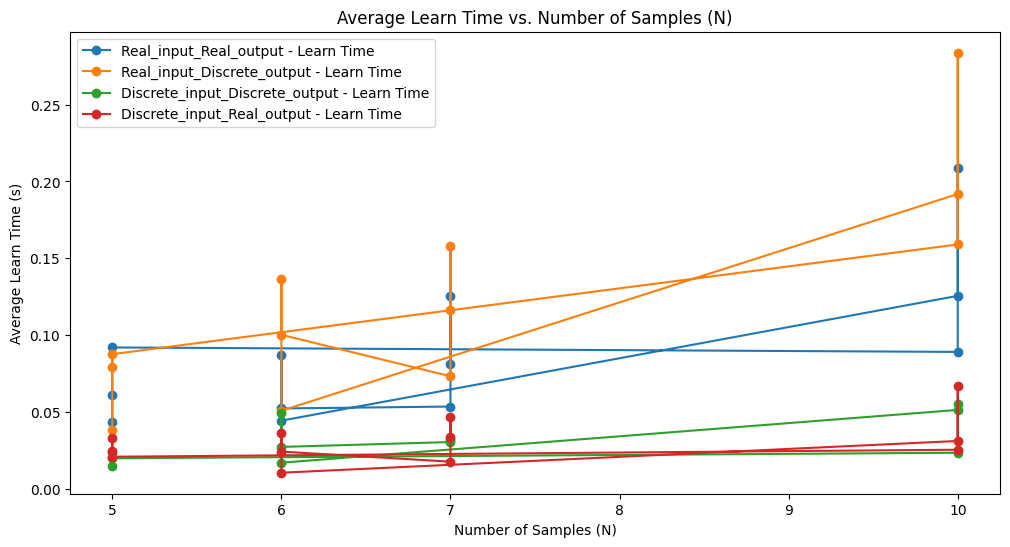

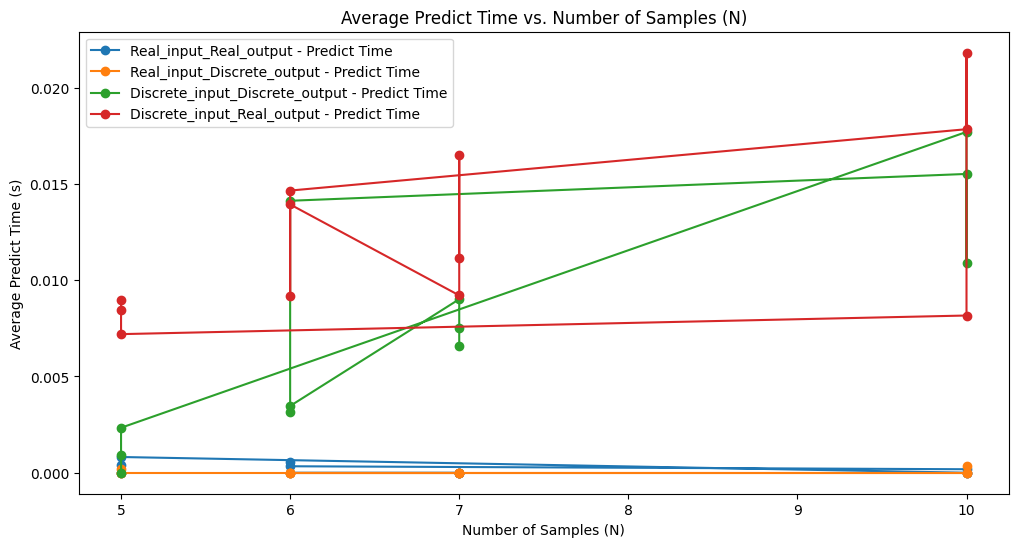

In [13]:
# Function to plot the results
# ...
def plot_results(results_df):
    plt.figure(figsize=(12, 6))
    for data_type in results_df["Type"].unique():
        subset = results_df[results_df["Type"] == data_type]
        plt.plot(subset["N"], subset["Average Learn Time (s)"], label=f"{data_type} - Learn Time", marker='o')

    plt.title("Average Learn Time vs. Number of Samples (N)")
    plt.xlabel("Number of Samples (N)")
    plt.ylabel("Average Learn Time (s)")
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 6))
    for data_type in results_df["Type"].unique():
        subset = results_df[results_df["Type"] == data_type]
        plt.plot(subset["N"], subset["Average Predict Time (s)"], label=f"{data_type} - Predict Time", marker='o')

    plt.title("Average Predict Time vs. Number of Samples (N)")
    plt.xlabel("Number of Samples (N)")
    plt.ylabel("Average Predict Time (s)")
    plt.legend()
    plt.show()

# Other functions
# ...
# Run the functions, Learn the DTs and Show the results/plots
plot_results(results_df)